In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path
import math

In [2]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [3]:
if os.path.isfile('Coordinate_Meas_1'):
    my_scan = genfromtxt('Coordinate_Meas_1', delimiter=',')
#control the scanning data is there while

In [4]:
Coordinate_Meas= 'Coordinate_Meas_'+ str(1)

In [5]:
Coordinate_Meas

'Coordinate_Meas_1'

In [6]:
Self_Position = genfromtxt('Self_Localization_Meas_1', delimiter=',')

In [7]:
Heading = genfromtxt('Heading_Meas_1', delimiter=',')

In [8]:
Heading = math.radians(Heading)

In [9]:
Heading

3.141592653589793

In [10]:
x=my_scan[0, :]
y= my_scan[1, :]

In [11]:
x[1]

132.39

In [12]:
len(x)

70

In [13]:
r,t=cart2pol(x,y)



In [14]:
Self_Position

array([140., 438.])

In [15]:
Self_x= Self_Position[0]* np.ones((1,len(x)))

In [16]:
Self_x+x

array([[270.9   , 272.39  , 261.67  , 264.94  , 259.18  , 140.    ,
        256.44  , 248.26  , 140.    , 240.55  , 140.    , 229.306 ,
        224.203 , 210.839 , 204.187 , 196.852 , 189.939 , 185.325 ,
        179.116 , 174.903 , 170.974 , 166.582 , 162.911 , 159.024 ,
        155.688 , 152.556 , 149.0541, 146.0027, 143.0018, 140.    ,
        137.0854, 134.1718, 131.2076, 128.42  , 125.184 , 122.544 ,
        119.648 , 116.48  , 113.406 , 110.133 , 106.227 , 103.408 ,
         98.609 ,  94.761 ,  90.566 ,  86.802 ,  81.233 ,  76.961 ,
         70.654 ,  65.44  ,  59.726 ,  52.342 ,  37.63  ,  31.4   ,
        140.    , 140.    ,   6.98  , 140.    , 140.    , 140.    ,
        140.    , 140.    , 140.    , 140.    , 140.    ,  23.67  ,
        140.    ,  37.73  ,  51.483 ,  57.573 ]])

In [17]:
Self_Position[1]

438.0

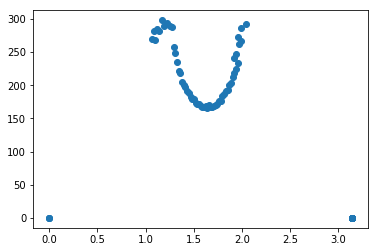

In [18]:
plt.scatter(t,r)

In [19]:
max(t)

3.141592653589793

In [20]:
the= np.linspace(1,2,1000)

In [21]:
y_interpolated= np.interp(the, t, r)


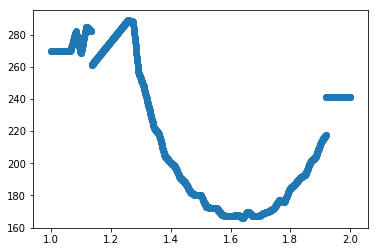

In [22]:
plt.scatter(the,y_interpolated);

In [23]:
x_new, y_new =pol2cart( y_interpolated,the)

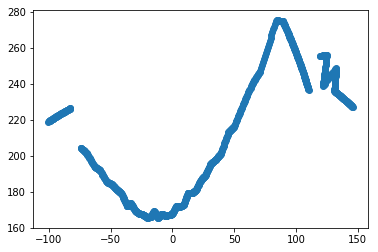

In [24]:
plt.scatter(x_new,y_new)

In [25]:
def Scanning_Map(Radius, Theta): 
    # Taking array of measurement data in shape of polar cooradinates 
    #Radius and Theta
    
    Scanning_length= int(np.amax(Radius))
    Scan_Map=np.zeros((Scanning_length,Scanning_length,3)) 
    #Scan_Map[:,:,0]=1;
    #Scan_Map[:,:,1]=1;

     #It is scanning map as 3 dimension like RGB
     # RGB= 111 means that scanned and defined as blank
     # RGB=100 means that scanned and defined as obstacle
     # RGB= 000 means that not scanned

    Array_length= len(Radius)
        
    for i in range(Array_length):
        
        # The only RED is 1 for the Radius for obstacle
        Scan_x, Scan_y=pol2cart(Radius[i],Theta[i])
        Scan_x=int(Scan_x)
        Scan_y=int(Scan_y)
        Scan_Map[Scan_x, Scan_y,0]=1
        Scan_Map[Scan_x, Scan_y,1]=0
        Scan_Map[Scan_x, Scan_y,2]=0
        
        for j in range(int(Radius[i])):
            
            # Until the radius, all of data are 1 for free space
            Scan_x, Scan_y=pol2cart(j,Theta[i])
            Scan_x=int(Scan_x)
            Scan_y=int(Scan_y)
            Scan_Map[Scan_x, Scan_y,0]=0
            Scan_Map[Scan_x, Scan_y,1]=1
            Scan_Map[Scan_x, Scan_y,2]=1
              
    return Scan_Map
        

In [26]:
#a=Scanning_Map(r,t)
a=Scanning_Map(y_interpolated,the)


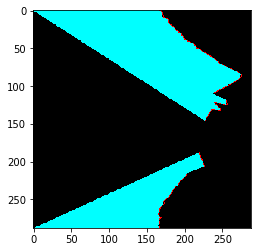

In [27]:
imgplot = plt.imshow(a)

In [29]:
item=np.where(a[:,:,0]==1)

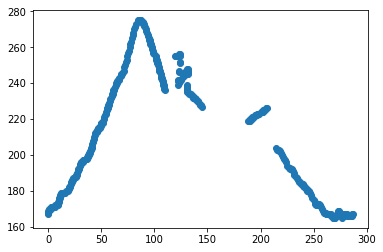

In [32]:
plt.scatter(item[0],item[1])